<font color = green >

# <center>EDA of car insurance dataset<center>
</font>

__Exploratory Data Analysis (EDA)__ of car insurance dataset.
    
__Dataset description:__ Car insurance claim. As you are working in the insurance company. Company wants to know the reason why claim was not made. Doing so would allow insurance company to improve there policy for giving loan to the customer. In this project you are dealing with various feature such as age, occupation etc. based on that let's get back to the final conculsion.    

__Steps:__
- Data Cleaning
- Descriptive Statistics
- Data Visualization
- Conclusions

## Import Python Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## Loading the data into a data frame

In [43]:
claims = pd.read_csv("./datasets/car_insurance_claim.csv")
claims.columns= claims.columns.str.lower()

## Inspecting the data

In [44]:
claims.shape

(10000, 20)

Our dataset has 10000 rows and 20 columns. Let's check the first and last few rows of the dataset using `head()` and `tail()` methods.

In [45]:
claims.head()

,unnamed: 0,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,0,569520,65+,female,majority,0-9y,high school,upper class,0.629027313918201,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,1,750365,16-25,male,majority,0-9y,none,poverty,0.3577571170184627,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,2,199901,16-25,female,majority,0-9y,high school,working class,0.4931457852181982,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,3,478866,16-25,male,majority,0-9y,university,working class,0.2060128507324556,1.0,before 2015,0.0,none,32765,11000.0,sedan,0,0,0,0.0
4,4,731664,26-39,male,majority,10-19y,none,working class,0.3883658881572184,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0


In [46]:
claims.tail()

,unnamed: 0,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
9995,9995,323164,26-39,female,majority,10-19y,university,upper class,0.5827870696562382,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,9996,910346,26-39,female,majority,10-19y,none,middle class,0.5222314755016938,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,9997,468409,26-39,male,majority,0-9y,high school,middle class,0.4709402314479679,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,9998,903459,26-39,female,majority,10-19y,high school,poverty,0.3641847847297929,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0
9999,9999,442696,26-39,female,majority,0-9y,none,working class,0.4352247779429113,1.0,before 2015,1.0,1.0,10238,13000.0,sedan,0,0,0,0.0


In [47]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   unnamed: 0           10000 non-null  int64 
 1   id                   10000 non-null  int64 
 2   age                  9950 non-null   object
 3   gender               9950 non-null   object
 4   race                 9951 non-null   object
 5   driving_experience   9950 non-null   object
 6   education            9951 non-null   object
 7   income               10000 non-null  object
 8   credit_score         8978 non-null   object
 9   vehicle_ownership    9950 non-null   object
 10  vehicle_year         9950 non-null   object
 11  married              9952 non-null   object
 12  children             9950 non-null   object
 13  postal_code          9950 non-null   object
 14  annual_mileage       9000 non-null   object
 15  vehicle_type         9951 non-null   object
 16  speed

The majority of columns, excluding `id` and `income`, contain missing values. Columns like `credit_score`, `vehicle_ownership`, `married`, `children`, `annual_mileage`, `speeding_violations`, `duis`, `past_accidents` and `outcome` have `object` datatype instead of `int` or `float`. Also we can delete `unnamed: 0` column as it duplicates indexes.

Let's check unique values in each column.


In [48]:
claims.nunique()

unnamed: 0             10000
id                     10000
age                        5
gender                     3
race                       3
driving_experience         5
education                  3
income                     4
credit_score            8929
vehicle_ownership          3
vehicle_year               3
married                    3
children                   3
postal_code                9
annual_mileage            22
vehicle_type               3
speeding_violations       22
duis                       8
past_accidents            16
outcome                    3
dtype: int64

In [49]:
columns = [column for column in claims.columns if column not in ['id', 'credit_score', 'unnamed: 0', 'postal_code', 'annual_mileage']]
pd.set_option("max_colwidth", 60)
display(claims[columns].apply(lambda col: col.dropna().unique()))
pd.reset_option("max_colwidth")

age                                               [65+, 16-25, 26-39, 40-64, none]
gender                                                        [female, male, none]
race                                                    [majority, minority, none]
driving_experience                              [0-9y, 10-19y, 20-29y, 30y+, none]
education                                          [high school, none, university]
income                         [upper class, poverty, working class, middle class]
vehicle_ownership                                                 [1.0, 0.0, none]
vehicle_year                                       [after 2015, before 2015, none]
married                                                           [0.0, 1.0, none]
children                                                          [1.0, 0.0, none]
vehicle_type                                             [sedan, sports car, none]
speeding_violations    [0, 2, 3, 7, 6, 4, 10, 13, 1, 5, 9, 8, 12, none, 11, 15,...
duis

As observed, the string “none” is present in nearly all columns. Our next step is to replace it with `np.nan`.

Now, let’s generate descriptions for each column, taking into account their names, data types, and the uniqueness of values: 
<br/><br/>

| Column | Description                                                                                                              |
|--------|--------------------------------------------------------------------------------------------------------------------------|
| `id` | unique client identifier                                                                                                 |
| `age` | client's age: <br> <ul><li>16-25</li><li>26-39</li><li>40-64</li><li>65+</li></ul>                                       |
| `gender` | client's gender: <br> <ul><li>female</li><li>male</li></ul>                                                              |
| `driving_experience` | the number of years a client has been driving: <br> <ul><li>0-9</li><li>10-19</li><li> 20-29</li><li>30+</li></ul>       |
| `education` | client's level of education: <br> <ul><li>high school</li><li>university</li></ul>                                       |
| `income` | client's income level: <br> <ul><li>poverty</li><li>working class</li><li>middle class</li><li>upper class</li></ul>     |
| `credit_score` | client's credit score (between zero and one)                                                                             |
| `vehicle_ownership` | client's vehicle ownership status: <br><ul><li>`0`: does not own their vehilce</li><li>`1`: owns their vehicle</li></ul> |
| `vehcile_year` | year of vehicle registration: <br><ul><li>before 2015</li><li> after 2015</li></ul>                                      |
| `married` | client's marital status: <br><ul><li>`0`: not married</li><li>`1`: married</li></ul>                                     |
| `children` | client's children status: <br><ul><li>`0`: does not have children</li><li>`1`: has at least 1 child</li></ul>            |
| `postal_code` | client's postal code                                                                                                     | 
| `annual_mileage` | number of miles driven by the client each year                                                                           |
| `vehicle_type` | type of car: <br> <ul><li>sedan</li><li>sports car</li></ul>                                                             |
| `speeding_violations` | total number of speeding violations received by the client                                                               | 
| `duis` | number of times the client has been caught driving under the influence of of alcohol, drugs, or other substances         |
| `past_accidents` | total number of previous accidents the client has been involved in                                                       |
| `outcome` | the company provided car insurance for the individual: <br><ul><li>`0`: no</li><li>`1`: yes</li></ul>         |


## Data Preparation

### Duplicate values 

In [50]:
claims.duplicated().sum()

0

### Dropping columns

Columns such as `unnamed: 0`, `id`, `postal_code`, `race` will not be relevant for our analysis, so we can get rid of these.  

In [51]:
claims.drop(['unnamed: 0', 'id', 'postal_code', 'race'], axis=1, inplace=True)

### Missing values
We will start with replacing `"none"` values with `np.nan`

In [52]:
claims.replace('none', np.nan, inplace=True)

Updating data type of columns

In [53]:
float_columns = ['credit_score']
int_columns = ['speeding_violations', 'past_accidents', 'outcome', 'vehicle_ownership', 'married', 'children', 'duis', 'annual_mileage']

# we can not change type to int while there are missing values in column
for col in float_columns + int_columns:
    claims[col] = claims[col].astype('float')

Let's check % of missing values in each column. 

In [54]:
(claims.isnull().sum()/(len(claims)))*100.

age                     1.00
gender                  0.99
driving_experience      1.00
education              19.96
income                  0.00
credit_score           10.72
vehicle_ownership       1.00
vehicle_year            1.00
married                 0.98
children                1.00
annual_mileage         10.50
vehicle_type            0.99
speeding_violations     0.99
duis                    1.00
past_accidents          1.00
outcome                 1.00
dtype: float64

We can notice the highest number of missing values in columns such as `education`, `credit_score`, `annual_mileage`. Our initial step should involve filling in these columns. 

Let's visualize out missing values in each column to understand the distribution of it in out dataset.

<Axes: >

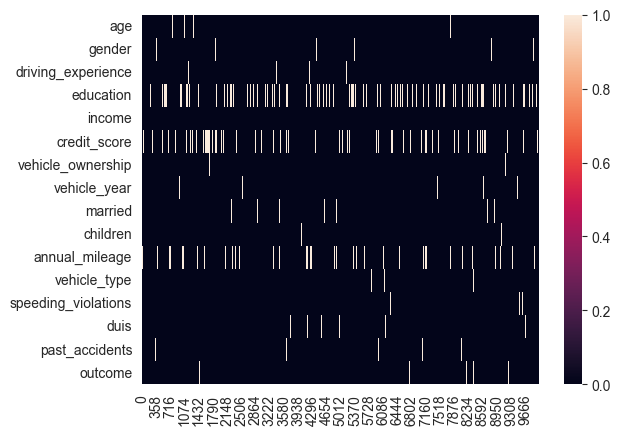

In [55]:
sns.heatmap(claims.isna().transpose())

As mentioned earlier, the largest amount of missing data is found in the `education`, `credit_score`, and `annual_mileage` columns. There are no discernible patterns or correlations in the distribution of the missing values; the `nan`/`Null` values appear in various columns across different rows. Our initial approach to addressing missing data involves removing rows with missing values, but we will limit this removal to no more than 5% of our entire dataset.

In [56]:
claims.dropna(subset=['vehicle_type', 'vehicle_year', 'driving_experience', 'outcome', 'gender'], inplace=True)

Since we lack information about the client's education, we will replace the missing values with `"unknown"`.

In [57]:
claims['education'].fillna('unknown',inplace=True)

We've established a connection between the `credit score` and the `income` column. As a result, we can replace the missing `credit score` values with the average `credit score` based on the client's `income`. We'll apply a similar approach to the `vehicle_ownership` column. However, in this case, we'll fill the missing values with the median value, which can be either *1* or *0*.

In [58]:
income_grouped = claims.groupby('income')

claims['credit_score'] = (
    income_grouped['credit_score'].apply(lambda group: group.fillna(group.mean())).reset_index(level=0)['credit_score']
)
claims['vehicle_ownership'] = (
    income_grouped['vehicle_ownership']
    .apply(lambda group: group.fillna(group.median()))
    .reset_index(level=0)['vehicle_ownership']
)

There is a clear correlation between a client's age and their years of driving experience. Based on this relationship, we can make certain assumptions, such as inferring that a person with 30+ years of driving experience is likely to be 65+ years old, and someone with 0-9 years of experience falls within the age range of 16 to 25.

In [59]:
driving_experience_to_age = {
    '0-9y': '16-25',
    '10-19y': '26-39',
    '20-29y': '40-64',
    '30y+': '65+'
}
for key, value in driving_experience_to_age.items():
    mask = claims['driving_experience'] == key
    claims.loc[mask, 'age'] = claims.loc[mask,'age'].fillna(value)

Our research indicates a connection between `annual_mileage` and `age`, where younger individuals tend to drive more throughout the year. Therefore, we plan to replace the missing `annual_mileage` values with the average `annual_mileage` specific to `age` groups.

In [60]:
claims['annual_mileage'] = (
    claims.groupby('age')['annual_mileage']
    .apply(lambda group: group.fillna(group.mean())).reset_index(level=0)['annual_mileage']
)

We also discovered variations in columns like `past_accidents`, `speeding_violations`, and `duis` among different groups based on both `driving_experience` and `gender`. Consequently, we have chosen to address the missing values by filling them with the median values from these specific `(driving_experience,gender)` groups.

In [61]:
columns = ['past_accidents', 'speeding_violations', 'duis']

for col in columns:
    claims[col] = (
        claims
            .groupby(['driving_experience','gender'])[col]
            .apply(lambda x: x.fillna(x.median()))
            .reset_index(level=[0, 1])[col]
    )

We can assume that individuals with children are more likely to be married, and conversely, married individuals are more likely to have children.

In [62]:
columns = ['children', 'married']
for idx, col in enumerate(columns):
    claims[col] = claims[col].fillna(claims[columns[idx - 1]])

Let's check the missing data.

In [63]:
claims.isnull().sum()

age                    0
gender                 0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
annual_mileage         0
vehicle_type           0
speeding_violations    0
duis                   0
past_accidents         0
outcome                0
dtype: int64

In [64]:
for col in int_columns:
    claims[col] = claims[col].astype('int')

After all our manipulations let's reset index in out dataframe.

In [65]:
claims.reset_index(drop=True, inplace=True)

Let's verify that all the data with a numeric nature is assigned the correct data type.

In [66]:
numerical_columns = claims.select_dtypes('number').columns
numerical_columns

Index(['credit_score', 'vehicle_ownership', 'married', 'children',
       'annual_mileage', 'speeding_violations', 'duis', 'past_accidents',
       'outcome'],
      dtype='object')

We need to correct numerical columns, as certain columns, such as `vehicle_ownership`, `married`, `children`, and `outcome` are considered categorical, even when they are represented using numerical values, namely 0 and 1.

In [67]:
zero_one_columns = ['vehicle_ownership', 'married', 'children', 'outcome']
for col in zero_one_columns:
    claims[col] = claims[col].astype('object')

Now we will check categorical columns.

In [68]:
categorical_columns = claims.select_dtypes('object').columns
categorical_columns

Index(['age', 'gender', 'driving_experience', 'education', 'income',
       'vehicle_ownership', 'vehicle_year', 'married', 'children',
       'vehicle_type', 'outcome'],
      dtype='object')

In [69]:
numerical_columns = claims.select_dtypes('number').columns

### Conclusions
- Correct data types have been applied consistently to enhance data clarity.
- Missing values have been appropriately managed through imputation, preserving dataset completeness, some of missing values were deleted.

The dataset is now clean and ready for deeper analysis and insights.

## Analyzing the data


### Descriptive Statistics

In [70]:
claims.describe()

,credit_score,annual_mileage,speeding_violations,duis,past_accidents
count,9512.000000,9512.000000,9512.000000,9512.000000,9512.000000
mean,0.515227,11712.733389,1.468566,0.235492,1.048675
std,0.134551,2684.207967,2.231069,0.553755,1.647856
min,0.053358,2000.000000,0.000000,0.000000,0.000000
25%,0.421134,10000.000000,0.000000,0.000000,0.000000
50%,0.523660,12000.000000,0.000000,0.000000,0.000000
75%,0.614541,13000.000000,2.000000,0.000000,2.000000
max,0.960819,22000.000000,22.000000,6.000000,15.000000


In [71]:
claims.describe(include='object')

,age,gender,driving_experience,education,income,vehicle_ownership,vehicle_year,married,children,vehicle_type,outcome
count,9512,9512,9512,9512,9512,9512,9512,9512,9512,9512,9512
unique,4,2,4,3,4,2,2,2,2,2,2
top,26-39,female,0-9y,high school,upper class,1,before 2015,0,1,sedan,0
freq,2934,4768,3380,3919,4114,6632,6639,4775,6521,9065,6519


### Univariate analysis
#### Proportion of clients by categorical columns

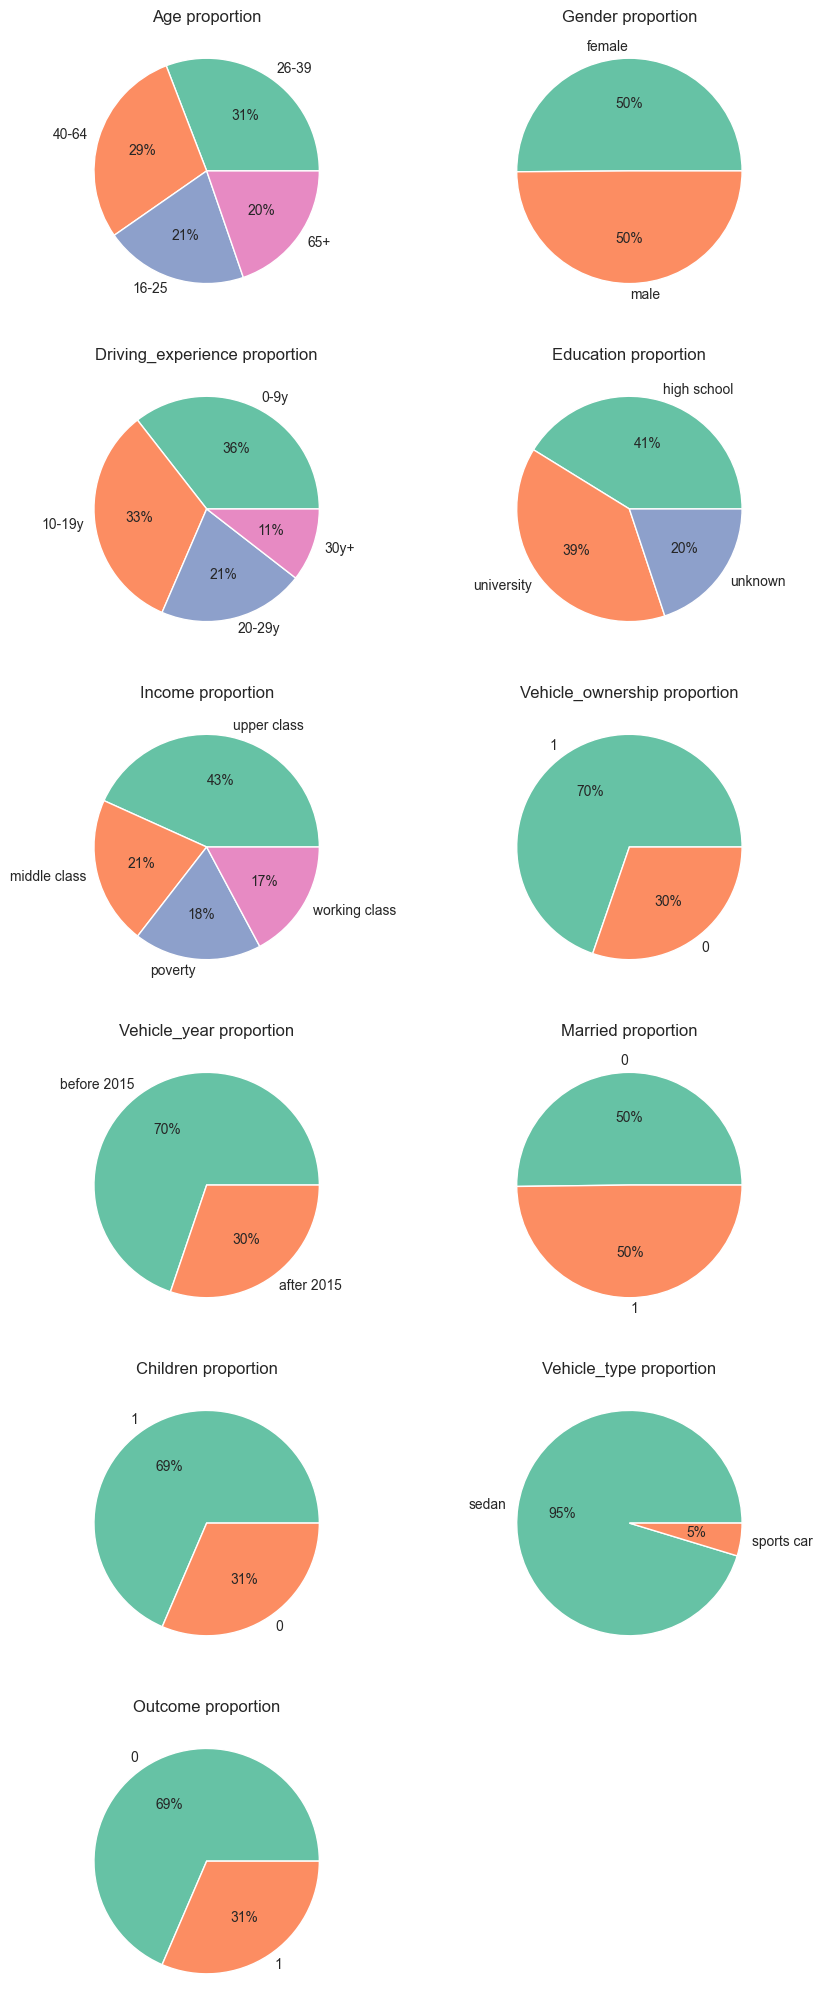

In [72]:
colors = sns.color_palette("Set2")

plt.figure(figsize=(10, 30))
plt.subplots_adjust(hspace=0.2, wspace=0.2)
for n, col in enumerate(categorical_columns):
    ax = plt.subplot(7, 2, n+1)
    ax.set_title(f'{col.capitalize()} proportion')
    counts = claims[col].value_counts()
    plt.pie(counts.values, labels=counts.index, autopct='%0.0f%%', colors=colors)
plt.show()

**Observations**
- Our clients are primarily distributed as follows: the largest group falls within the ***age*** range of 26 to 39 years (comprising 31%), followed by the group between 40 and 64 years (constituting 29%). The two smaller groups consist of the youngest and oldest individuals, accounting for 21% and 20% of the total, respectively. <br/><br/>
- The ***gender*** distribution in our dataset is fairly balanced, with 50% male and 50% female clients. <br/><br/>
- Most clients in the dataset have ***driving experience*** ranging from 0 to 19 years, accounting for 69% of the total. The highly experienced clients, with 30+ years of experience, constitute 11% of the dataset. <br/><br/>
- The proportion of high school and university graduates in the dataset shows little variation, with 41% and 39%, respectively. However, it's important to note that information about the ***education*** level of 20% of clients is missing. <br/><br/>
- The majority (43%) of clients in the dataset belong to the upper class. The ***income*** of 21% clients is middle. Individuals in poverty account for 18%, working class - 17%. <br/><br/>
- Most clients own cars manufactured before 2015, constituting 70% of the dataset. 30% of clients possess ***vehicles year*** after the year 2015. <br/><br/>
- It is expected that significant majority of customers opt for ***vehicle types*** like sedans, with only 5% preferring sports cars. <br/><br/>
- 50% of clients are ***married*** and 69% have at least one ***child***. <br/><br/>
- The majority (70%) of clients have ***own vehicle***. <br/><br/>
- Car insurance applications for 69% of clients were rejected by the company, while 31% had a positive ***outcome*** in obtaining insurance. <br/><br/>

**Conclusions**
The data's proportions mirror real-life proportions, with particular emphasis on income distributions, where upper-class and middle-class individuals are prominently represented.


#### Distribution of credit score range using histogram and boxplot

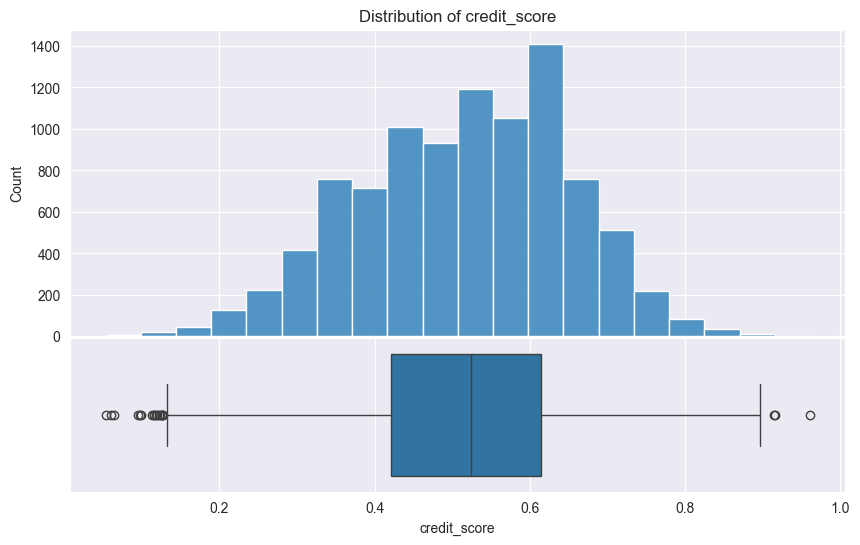

In [73]:
def draw_distribution(column, bins=20):
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,6), gridspec_kw={'height_ratios': [2, 1]})
    plt.subplots_adjust(hspace=0.01)
    ax1.set_title(f'Distribution of {column}')
    sns.histplot(data=claims, x=column, ax=ax1, common_bins=True, bins=bins)
    sns.boxplot(data=claims, x=column, ax=ax2)
    plt.show()

draw_distribution('credit_score')

**Observations**
- The credit scores of clients follow a normal distribution.
- We can observe four bars that are slightly taller than the adjacent ones. These correspond to the four values that filled the missing cells in this column.
- The median is approximately 0.5, while the minimum value in dataset is 0.05, and the maximum value is 0.95.
- The majority of the data falls within the range of 0.4 to 0.6.
- Outliers are noticeable on both sides of the whiskers, with a more significant concentration on the left side.

#### Distribution of annual mileage range using histogram and boxplot

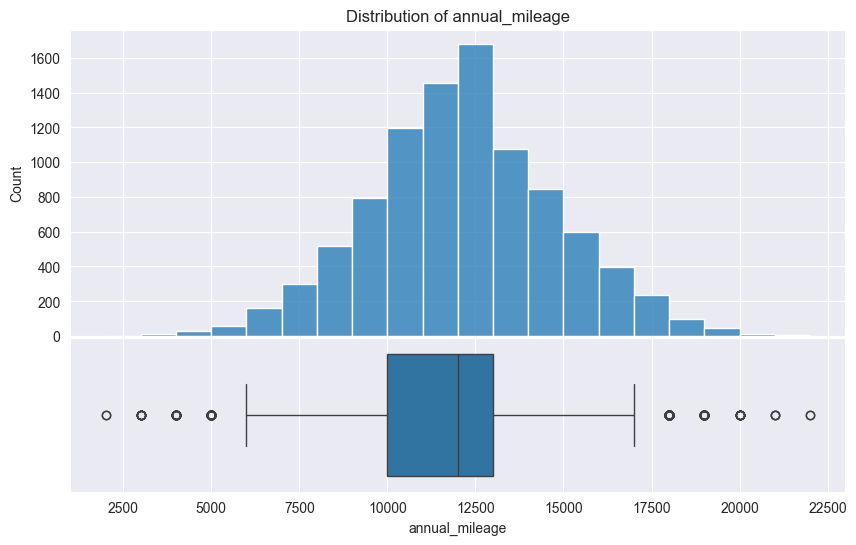

In [74]:
draw_distribution('annual_mileage')

**Observations**
- The annual mileage driven by individuals follow a normal distribution.
- We can observe in the boxplot that distribution is skewed to the left, so the mean is slightly less than the median.
- The median is approximately 12000, while the minimum value in dataset is 2000, and the maximum value is 22000.
- Outliers are noticeable on both sides of the whiskers.

#### Distribution of seeping violations, duis, and past accidents range using histogram and boxplot

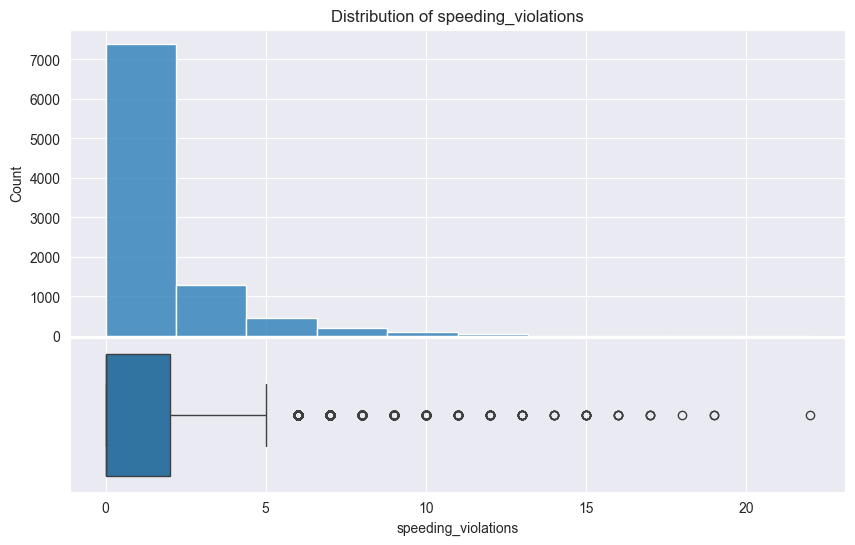

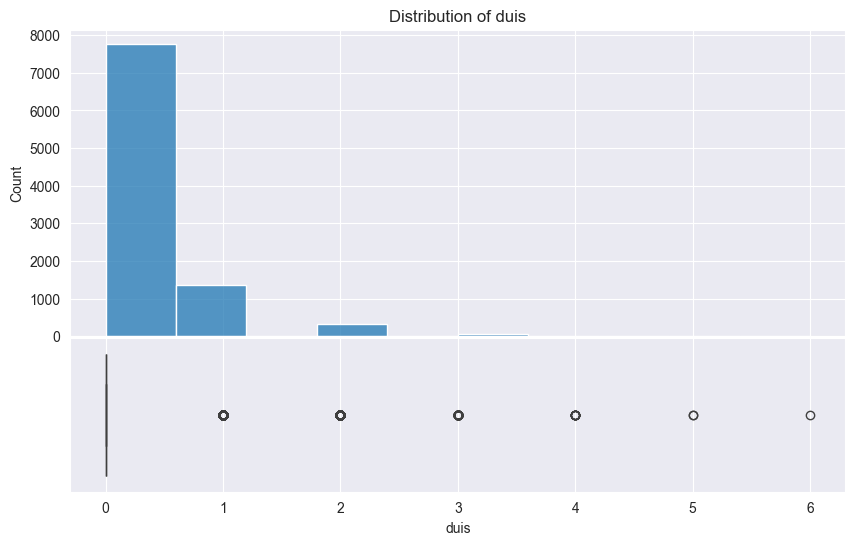

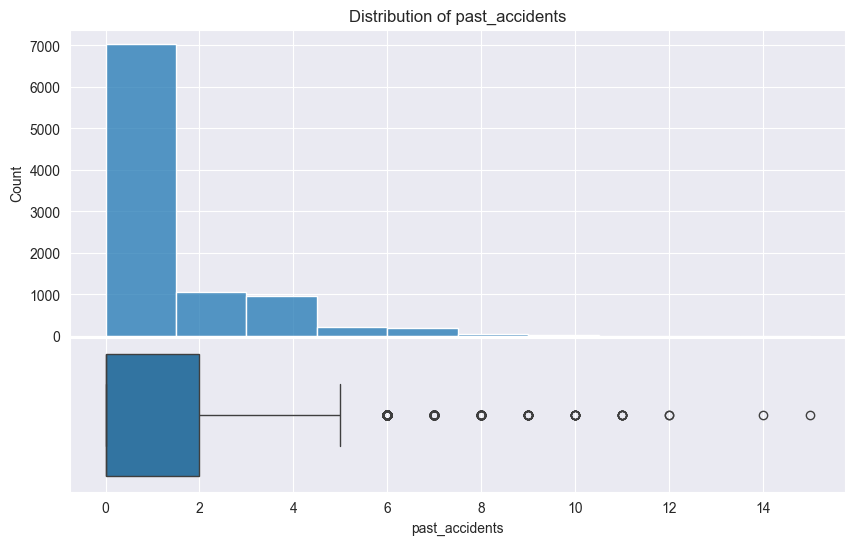

In [75]:
for col in numerical_columns[2:]:
    draw_distribution(col, bins=10)

**Observations**
- All three variables follow positively skewed distribution (right-skewed).
- There are outliers on the right side.
- `speeding_violation`:
    - the max value is 22; the majority of the data falls within the range of 0 to 2.
- `duis`:
    - the max value is 6; Q1=Q3=0, it means that the majority of the data is zero, while a few data points may have much higher values.
- `past_accidents`:
    - the max value is 15; the majority of the data falls within the range of 0 to 2; all data points that have higher value than 5 are considered like outliers.

### Bivariate analysis
#### Analyzing outcome (Categorical-Categorical)

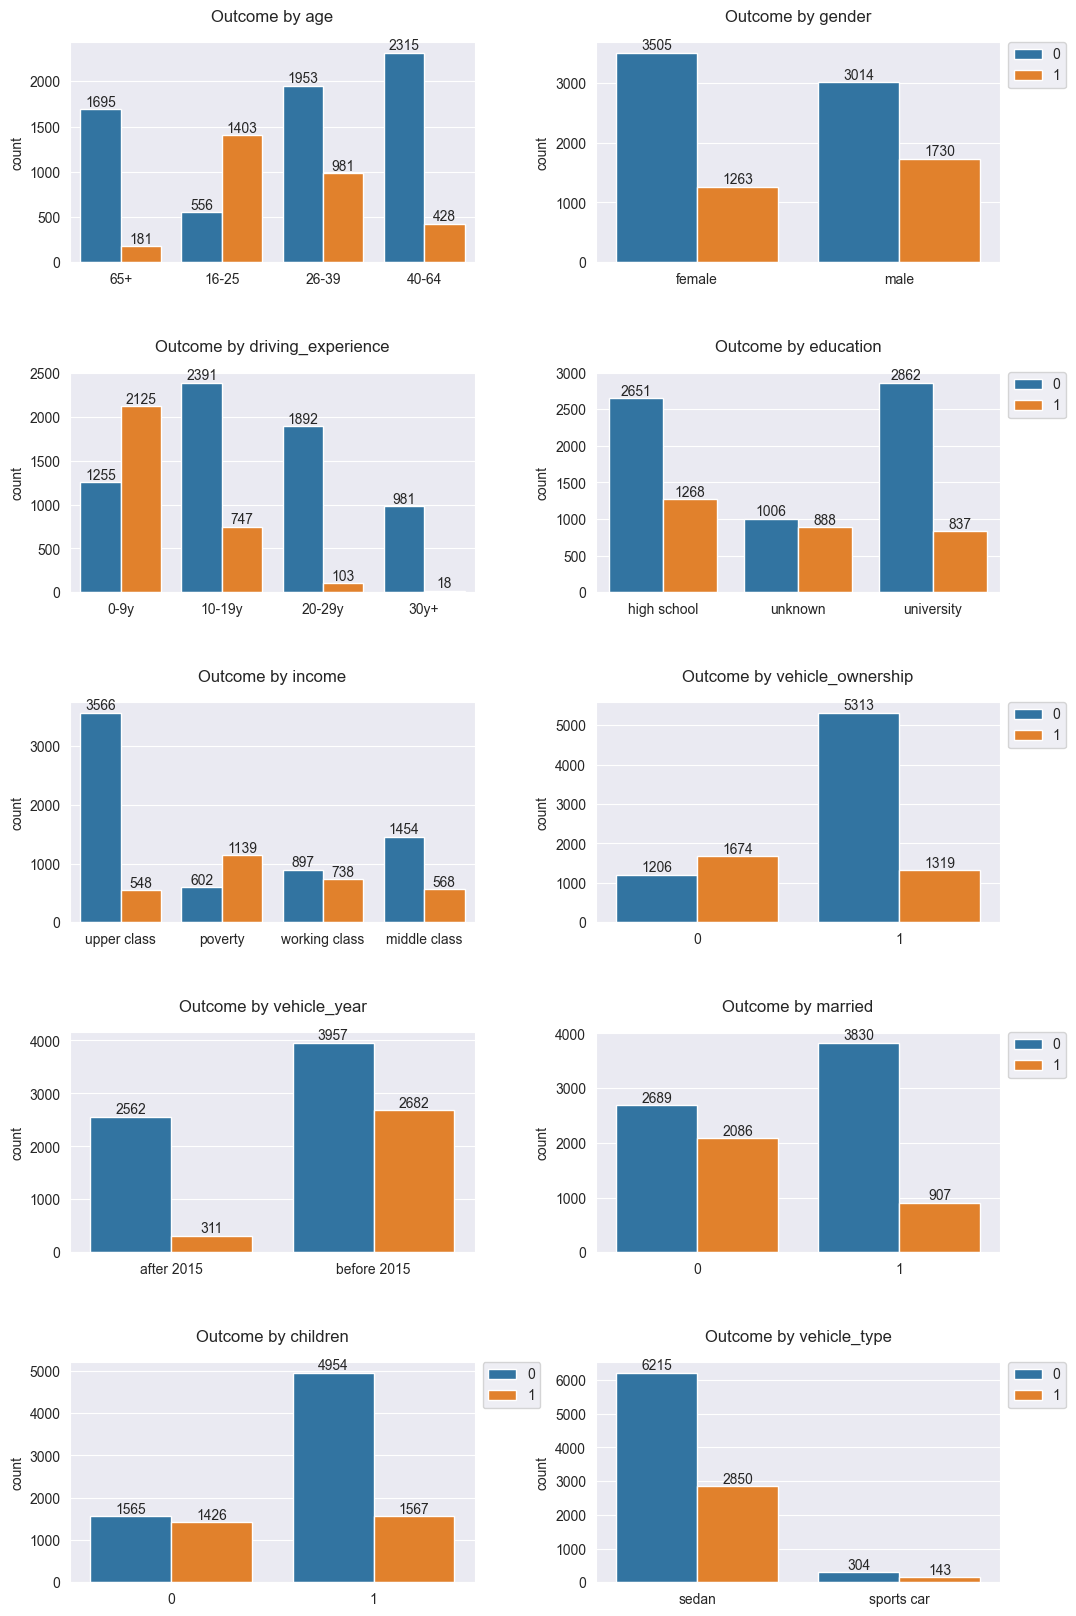

In [76]:
fig, axes = plt.subplots(5, 2, figsize=(12, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
categorical_columns_without_outcome = [x for x in categorical_columns if x != 'outcome']
for col, ax in zip(categorical_columns_without_outcome, axes.flat[:]):
    sns.countplot(data=claims, x=col, ax=ax, hue="outcome")
    ax.set_title(f'Outcome by {col}', pad=15)
    ax.set(xlabel=None)
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    subplot = ax.get_subplotspec()
    if subplot.is_first_col() and not subplot.is_last_row():
        ax.get_legend().remove()
    for p in ax.patches:
        if p.get_height() != 0:
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()
            ax.annotate(int(y), (x, y), ha='center', va='bottom')
plt.show()

**Observations**

By analyzing the presented graphs, it becomes evident that our initial assumption regarding the definition of the `outcome` column was incorrect. It is highly probable that the `outcome` pertains to whether the client has applied for insurance payment during the year.

So,<br>

| Column    | Description                                                                                                                 |
|:----------|:----------------------------------------------------------------------------------------------------------------------------|
| `outcome` | whether the client made a claim on their car insurance <br><ul><li>`0`: no claim</li><li>`1`: made claim</li></ul>          |

Based on this assumption we can make the following **conclusions**:
- Insurance claims are most frequently filed by young (16-25y.o.) and inexperienced drivers (0-9y). As drivers age and gain experience, their likelihood of being involved in accidents and filing insurance claims decreases. <br/><br/>
- Females demonstrate a lower propensity to request insurance claims. Does this suggest that they are less tend to get into car accidents? Let's investigate this in the following section. <br/><br/>
- Insurance claims are submitted by high school graduates more often than university graduates. <br/><br/>
- It's evident that income has an impact on the likelihood of engaging with the insurance company. We can infer that individuals in poverty may possess older vehicles, which may experience more frequent breakdowns or pose greater risks in accidents. <br/><br/>
- There is a likelihood that individuals exercise more caution when driving their own vehicles as opposed to rented or "borrowed" ones. <br/><br/>
- Insurance claims are most frequently filled by owners of older cars. <br/><br/>
- There is no substantial disparity in the proportion of outcomes between sedan and sports car owners. <br/><br/>
- Married clients more rarely request insurance claims.

#### Female vs Male (Categorical-Numerical)

Let's investigate who demonstrates greater caution on the road: women or men. Through an analysis of driving behaviors, we seek to determine which group, male or female drivers, is of greater interest to insurance companies.

In [77]:
driving_incidents_columns = ["speeding_violations", "duis", "past_accidents"]
for col in driving_incidents_columns + zero_one_columns:
    claims[col] = claims[col].astype('int')

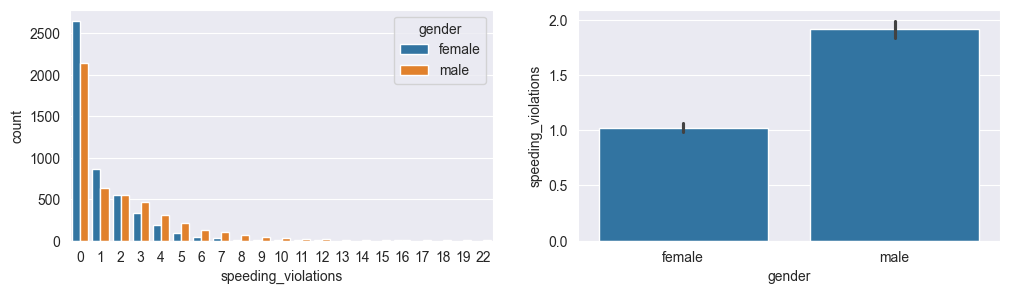

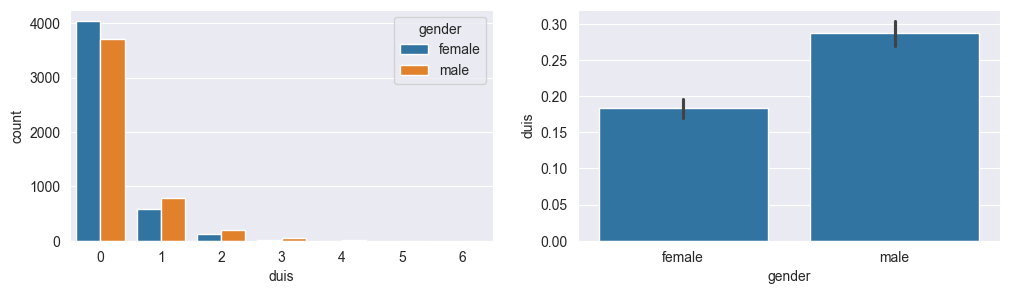

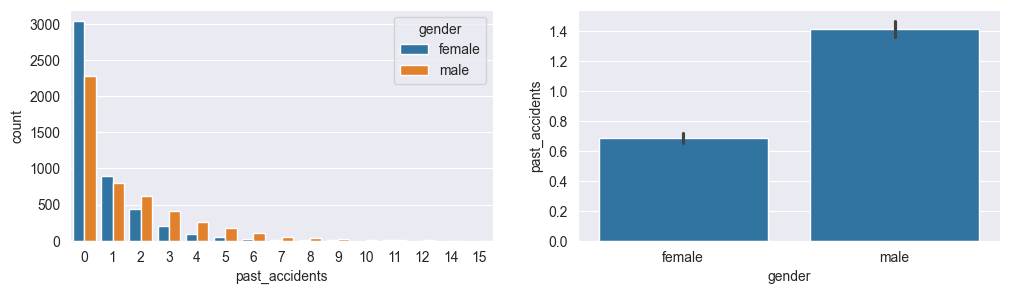

In [78]:
for col in driving_incidents_columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))
    sns.countplot(x=col, data=claims, hue='gender', ax=ax1)
    sns.barplot(x='gender', y=col, data=claims, ax=ax2)

The graphs clearly indicate that women are more responsible drivers. However, it's essential to consider whether this is influenced by their driving frequency. Further exploration is needed to delve into this aspect.

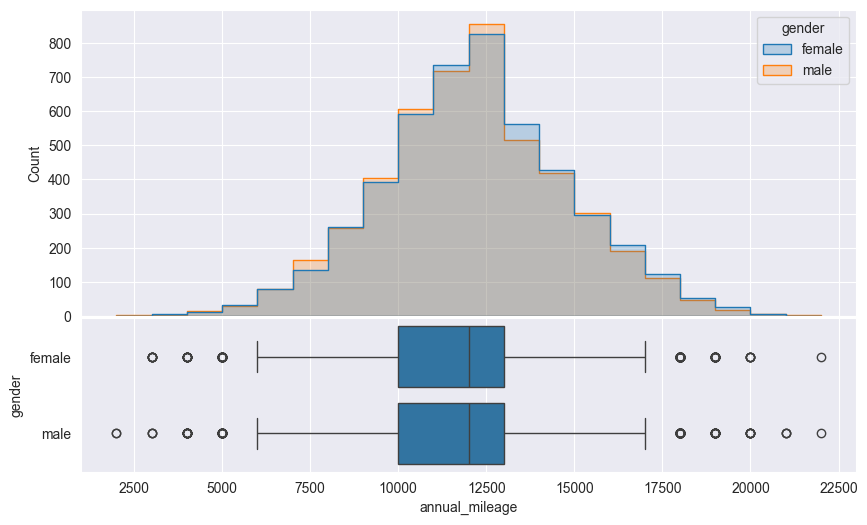

In [79]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,6), gridspec_kw={'height_ratios': [2, 1]})
plt.subplots_adjust(hspace=0.01)
sns.histplot(claims, x="annual_mileage", hue="gender", element="step", bins=20, ax=ax1)
sns.boxplot(x='annual_mileage', y='gender', data=claims, ax=ax2)
plt.show()

**Conclusions**
Our data reveals that women and men cover a similar number of miles annually. This leads to the inference of a correlation between gender and the occurrence of `speeding_violations`, `duis`, and `past_accidents`.

#### The relationship between numerical data (Numerical-Numerical)

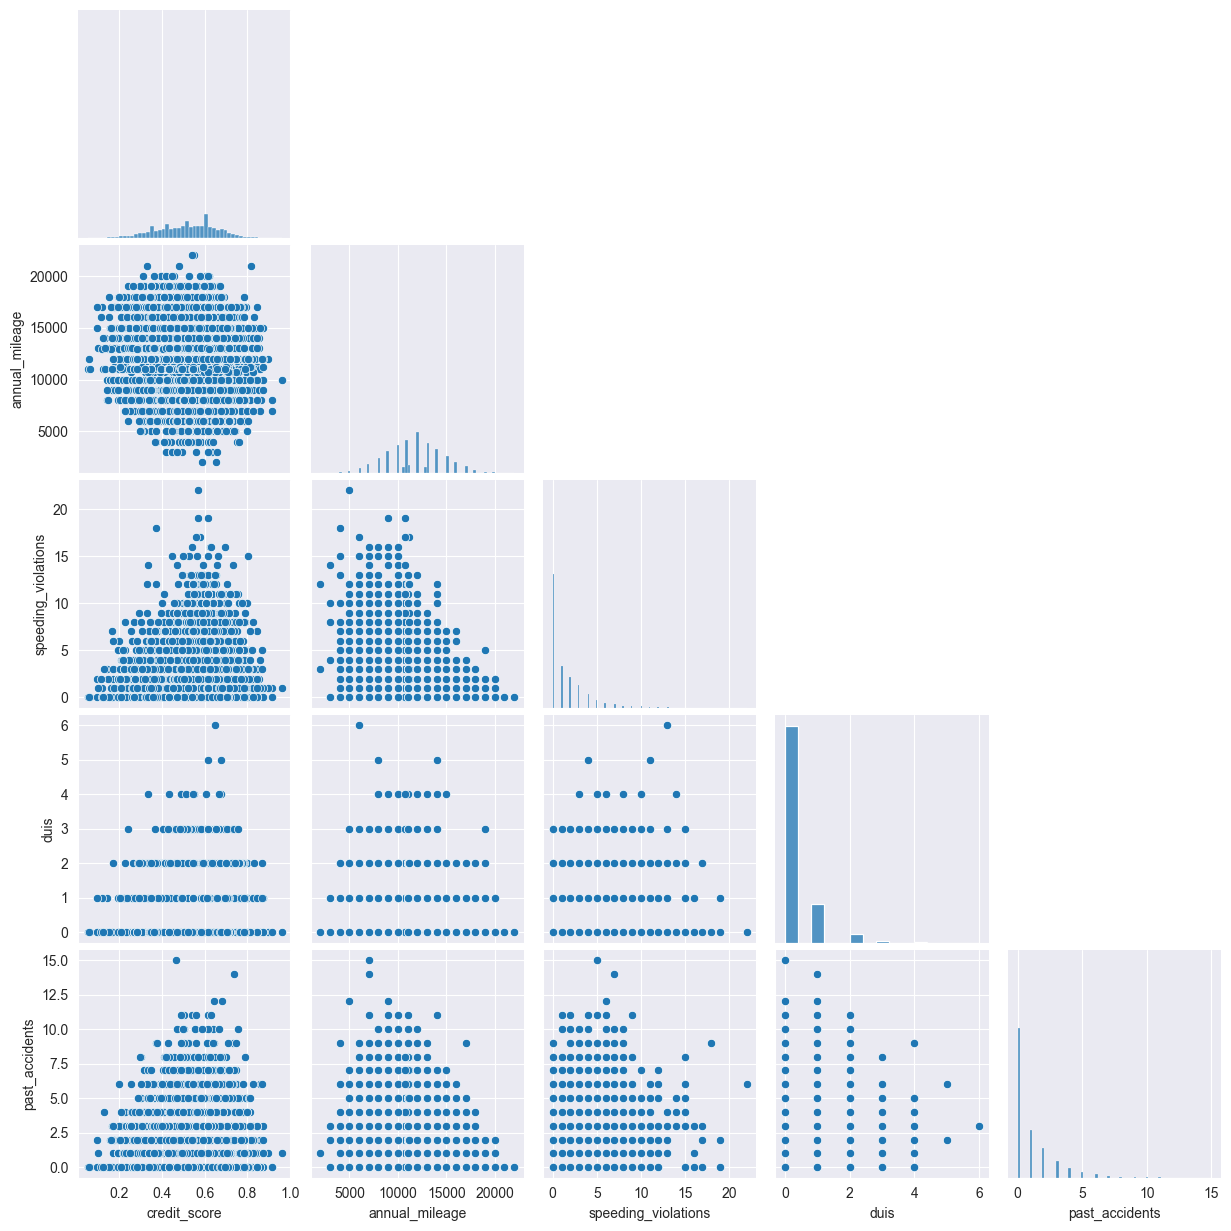

In [80]:
sns.pairplot(data=claims, vars=numerical_columns, corner=True)

As confirmed in our previous analysis, the numerical data can be divided into two categories: one half follows a normal distribution, while the other half displays a right-skewed pattern. Consequently, we will employ different correlation coefficients for the distinct pairs: Spearman's rank correlation coefficient for (normal, right-skewed) and (right-skewed, right-skewed) pairs, and Pearson's correlation coefficient (r) for the (normal, normal) pair.

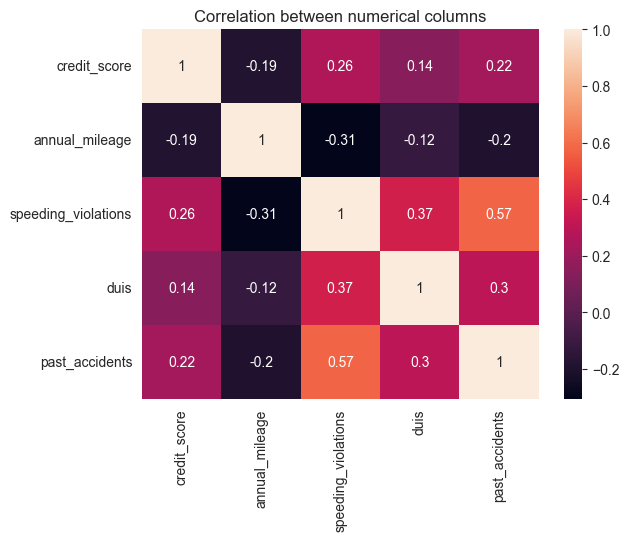

In [81]:
corr_matrix = claims[numerical_columns].corr(method='spearman')
corr_matrix.loc['credit_score', 'annual_mileage'] = corr_matrix.loc['annual_mileage', 'credit_score'] = (
    claims['credit_score'].corr(claims['annual_mileage'])
)
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation between numerical columns")
plt.show()

### Multivariate analysis

Let's identify the client groups with a higher propensity to submit a claim.

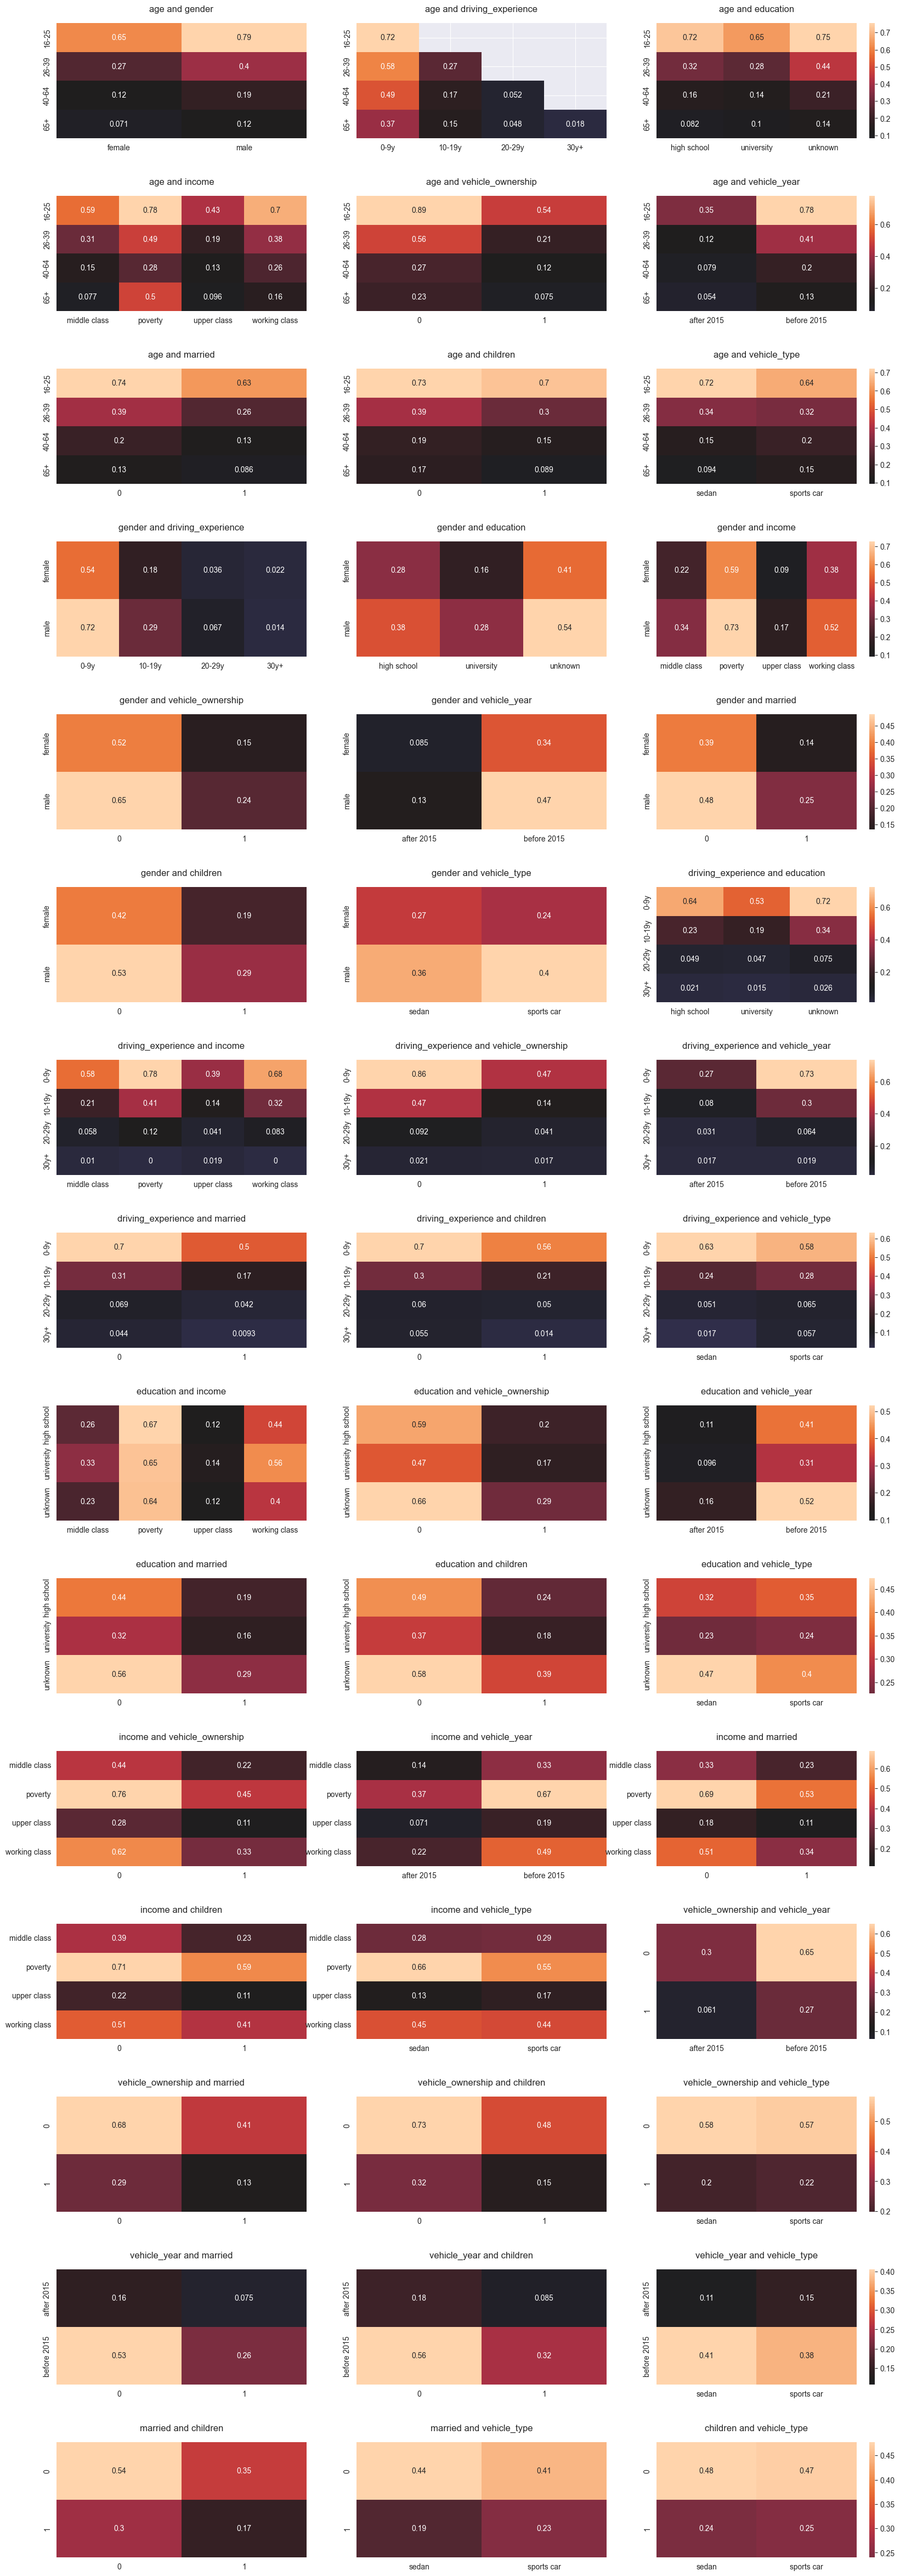

In [82]:
len_c = len(categorical_columns_without_outcome)
fig, axes = plt.subplots(15, 3, figsize=(20, 60))
plt.subplots_adjust(hspace=0.5, wspace=0.2)
n = 0

for i in range(len_c):
    col_1 = categorical_columns_without_outcome[i]
    for j in range(i+1, len_c):
        col_2 = categorical_columns_without_outcome[j]
        if i != j:
            pivot = pd.pivot_table(data=claims, index=col_1, columns=col_2, values='outcome')
            m, k = n//3, n%3
            ax = axes[m, k]
            sns.heatmap(pivot, annot=True, center=0.117, ax=ax, cbar=k == 2)
            ax.set_title(f"{col_1} and {col_2}", pad=15)
            ax.set(xlabel=None, ylabel=None)
            n+=1
plt.show()

**Conclusions**
Based on these plots, it appears that the highest claim rates are associated with young, unmarried men without children, lacking significant driving experience, residing in poverty, with unknown education status, and not owning a vehicle manufactured before 2015.
We will check it in the next section.


### Correlation analysis
#### Encoding categorical variables

In [83]:
categorical_columns_corr = ['age', 'gender', 'driving_experience', 'education', 'income', 'vehicle_year', 'vehicle_type']

In [84]:
claims_transformed = claims.copy()
for col in zero_one_columns:
    claims_transformed[col] = claims_transformed[col].astype(int)
for i in categorical_columns_corr:
    var = pd.get_dummies(claims_transformed[i], drop_first=False)
    claims_transformed.drop(i, axis=1, inplace=True)
    claims_transformed = pd.concat([claims_transformed, var], axis=1)

### Building the correlation matrix

In [85]:
corr_matrix = claims_transformed.corr()
corr_with_outcome = corr_matrix['outcome'].drop('outcome')
corr_with_outcome.loc[corr_with_outcome.abs().sort_values(ascending=False).index]

0-9y                   0.502082
16-25                  0.440352
vehicle_ownership     -0.378315
poverty                0.346110
upper class           -0.341118
credit_score          -0.332992
past_accidents        -0.313072
speeding_violations   -0.293107
after 2015            -0.292393
before 2015            0.292393
20-29y                -0.291794
married               -0.264208
children              -0.236420
65+                   -0.232870
30y+                  -0.218824
40-64                 -0.217441
annual_mileage         0.197508
duis                  -0.185955
unknown                0.165563
university            -0.151814
working class          0.134135
10-19y                -0.115747
male                   0.107434
female                -0.107434
middle class          -0.037756
26-39                  0.028333
high school            0.016037
sedan                 -0.002513
sports car             0.002513
Name: outcome, dtype: float64

<Axes: >

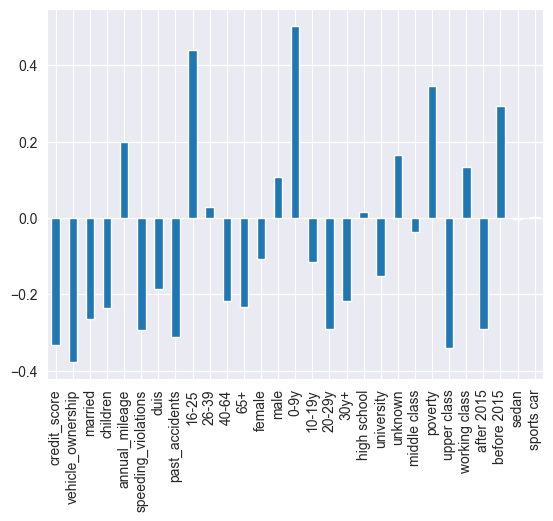

In [86]:
corr_with_outcome.plot.bar()

**Conclusions**
There is moderate positive correlation between `outcome` and:
- 0-9y `driving_experience`
- 16-25 `age`
- poverty `income`

moderate negative correlation between `outcome` and:
- `vehicle_ownership`
- upper_class `income`
- `credit_score`
- `past_accidents`

Probably some of these variables are correlated, e.x. `age` and `driving_experience`, but we will investigate it next time.

### Suggestions
- when the target is "outcome = 0," consider client attributes such as `age`, `driving experience`, `income`, and `credit_score`.
- establish specific thresholds or limits for variables like `past_accidents`, `duis`, and `speeding_violations`.
- implement a differentiated pricing strategy, potentially with higher rates for male clients and owners of old cars.
